In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as s
from scipy import stats as ss

In [2]:
df=pd.read_csv('after_cleaning_autos_file.csv')
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,Privat,Angebot,480,Test,Limousine,1993,Manuell,0,Golf,150000,3,Benzin,Volkswagen,Nein,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_sportback_2.7_tdi,Privat,Angebot,18300,Test,Coupe,2011,Manuell,190,A4,125000,5,Diesel,Audi,Ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_grand_cherokee_""overland""",Privat,Angebot,9800,Test,Suv,2004,Automatik,163,Grand,125000,8,Diesel,Jeep,Nein,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,Golf_4_1_4__3türer,Privat,Angebot,1500,Test,Kleinwagen,2001,Manuell,75,Golf,150000,6,Benzin,Volkswagen,Nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_fabia_1.4_tdi_pd_classic,Privat,Angebot,3600,Test,Kleinwagen,2008,Manuell,69,Fabia,90000,7,Diesel,Skoda,Nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367537,2016-03-21 09:50:58,Mitsubishi_cold,Privat,Angebot,0,Control,Limousine,2005,Manuell,0,Colt,150000,7,Benzin,Mitsubishi,Ja,2016-03-21 00:00:00,0,2694,2016-03-21 10:42:49
367538,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,Privat,Angebot,1199,Test,Cabrio,2000,Automatik,101,Fortwo,125000,3,Benzin,Smart,Nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
367539,2016-03-19 18:57:12,Volkswagen_multivan_t4_tdi_7dc_uy2,Privat,Angebot,9200,Test,Bus,1996,Manuell,102,Transporter,150000,3,Diesel,Volkswagen,Nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
367540,2016-03-20 19:41:08,Vw_golf_kombi_1_9l_tdi,Privat,Angebot,3400,Test,Kombi,2002,Manuell,100,Golf,150000,6,Diesel,Volkswagen,Nein,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


#### 1) The memory usage of the data is around 6.1 mb.How can we reduce the memory usage of the data set?

Here are several techniques to reduce the memory usage of a dataset:

1. Choose Appropriate Data Types:

          - Use more memory-efficient data types (e.g., using int32 instead of int64, float32 instead of float64) for numerical columns to store data efficiently.
              
2. Downcast Numeric Columns:

          - Downcast numeric columns using Pandas to reduce memory usage.
          - df = df.apply(pd.to_numeric, downcast='integer')

3. Convert Categorical Data:

         - Convert categorical variables to the Pandas category data type, which can significantly reduce memory usage.
         - df['category_column'] = df['category_column'].astype('category')
         
4. Remove Unnecessary Columns:

         - Drop columns that are not necessary for analysis to reduce the overall memory footprint.

5. Use File Compression Formats:

         - Use more memory-efficient file formats such as Parquet, Feather, or HDF5, which can store data more efficiently compared to CSV or Excel files.
         
6. Load Data in Chunks:

         - Process data in chunks using Pandas' chunksize parameter while reading large datasets to reduce memory usage.
7. Use External Libraries:

         - Libraries like Dask can handle larger-than-memory datasets by performing operations on smaller chunks of data.

8. Optimize Text Data:

         - Optimize text data by removing unnecessary characters or using tokenization, especially for free-text fields.

9. Use Sparse Data Structures:

          - For datasets with lots of zeros, consider using sparse data structures to save memory.

10. Clean Data and Remove Duplicates:

           - Cleaning data can eliminate unnecessary or duplicate records, reducing overall memory usage.
           
-- Write the reduced-memory DataFrame to a new file

 df.to_parquet('reduced_memory_data.parquet')

#### 2) What is the Average price of vehicle by fuel type and gearbox type.Give a plot


In [3]:
gpb = df.groupby(["fuelType","gearbox"])[["price"]].mean()

In [5]:
gpb2 = gpb.reset_index()
gpb2

,fuelType,gearbox,price
0,Andere,Automatik,3127.185185
1,Andere,Manuell,2543.164062
2,Benzin,Automatik,11512.902986
3,Benzin,Manuell,9799.083665
4,Cng,Automatik,6631.000000
5,Cng,Manuell,4461.487572
6,Diesel,Automatik,20971.145118
7,Diesel,Manuell,8650.747973
8,Elektro,Automatik,11522.909091
9,Elektro,Manuell,3944.888889


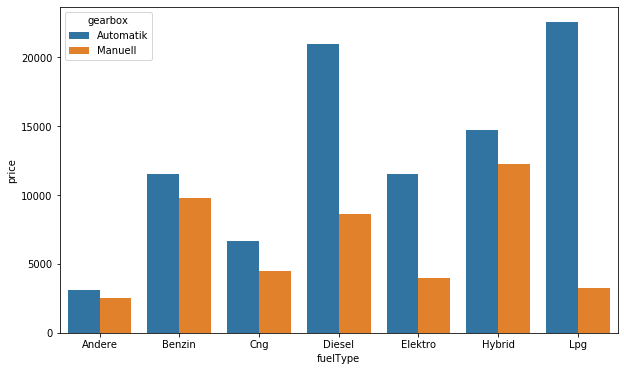

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(data=gpb2, x="fuelType", y="price", hue="gearbox")
plt.show()

#### 3) What is the Average power of a vehicle by vehicle type and gearbox type.Give a plot

In [20]:
gpb = df.groupby(["vehicleType","gearbox"])[["powerPS"]].mean()
gpb3 = gpb.reset_index()
gpb3

,vehicleType,gearbox,powerPS
0,Andere,Automatik,169.656766
1,Andere,Manuell,92.989595
2,Bus,Automatik,137.887810
3,Bus,Manuell,109.218067
4,Cabrio,Automatik,183.224539
5,Cabrio,Manuell,131.526974
6,Coupe,Automatik,213.727427
7,Coupe,Manuell,150.958616
8,Kleinwagen,Automatik,72.619872
9,Kleinwagen,Manuell,66.977733


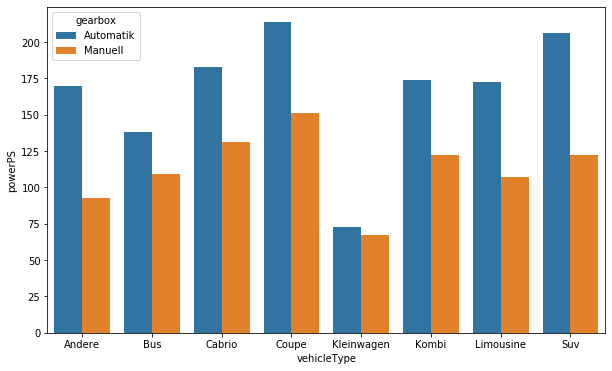

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(data=gpb3, x="vehicleType", y="powerPS", hue="gearbox")
plt.show()

#### 4) What is the Average price of a vehicle by brand as well as vehicle type.Use heatmap to explain this

In [18]:
gpb = df.groupby(["brand","vehicleType"])[["price"]].mean()
gpb4 = gpb.reset_index()
gpb4

,brand,vehicleType,price
0,Alfa_romeo,Andere,3153.333333
1,Alfa_romeo,Cabrio,9147.179487
2,Alfa_romeo,Coupe,6897.190083
3,Alfa_romeo,Kleinwagen,4466.242678
4,Alfa_romeo,Kombi,3580.161926
...,...,...,...
283,Volvo,Coupe,6040.930556
284,Volvo,Kleinwagen,3912.714286
285,Volvo,Kombi,9058.724448
286,Volvo,Limousine,5071.679878


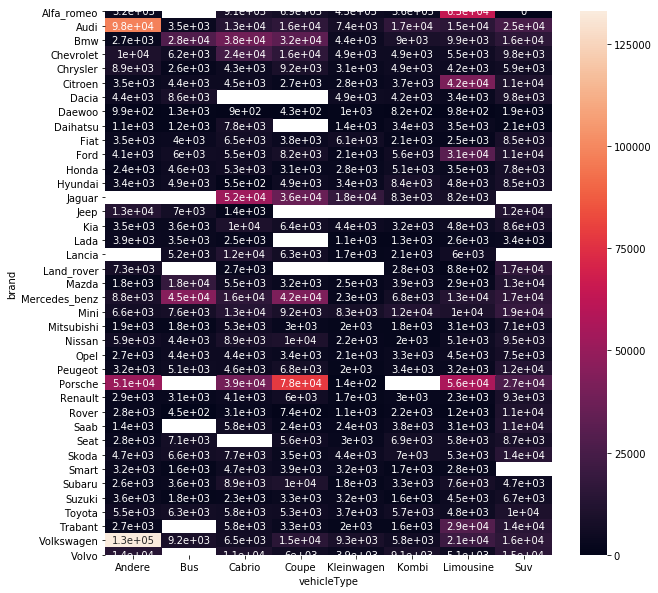

In [19]:
plt.figure(figsize=(10, 10))
ff=gpb4.pivot(index="brand", columns="vehicleType", values="price")
sns.heatmap(ff,annot=True)
plt.show()